# EDA for MTS-DIALOG dataset

The MTS-DIALOG dataset is a collection of 1,700 doctor-patient conversations paired with clinical notes, designed to support research in medical dialogue understanding and clinical note generation. In this notebook, we’ll explore the dataset to uncover statistical insights such as the distribution of document sections and the average length of dialogue per section. By the end, we’ll have a better understanding of the dataset’s structure and potential applications.

In [1]:
# import packages
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt_tab')
nltk.download("stopwords")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jackr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jackr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
# load data
data_1 = pd.read_csv("./dataset/MTS-Dialog-TrainingSet.csv")
data_2 = pd.read_csv("./dataset/MTS-Dialog-ValidationSet.csv")

data_3 = pd.read_csv("./dataset/MTS-Dialog-TestSet-1-MEDIQA-Chat-2023.csv")
data_4 = pd.read_csv("./dataset/MTS-Dialog-TestSet-2-MEDIQA-Sum-2023.csv")

df = pd.concat([data_1, data_2, data_3, data_4])
df.head()

,ID,section_header,section_text,dialogue
0,0,GENHX,The patient is a 76-year-old white female who ...,Doctor: What brings you back into the clinic t...
1,1,GENHX,The patient is a 25-year-old right-handed Cauc...,Doctor: How're you feeling today? \r\nPatient...
2,2,GENHX,"This is a 22-year-old female, who presented to...","Doctor: Hello, miss. What is the reason for yo..."
3,3,MEDICATIONS,Prescribed medications were Salmeterol inhaler...,Doctor: Are you taking any over the counter me...
4,4,CC,"Burn, right arm.","Doctor: Hi, how are you? \r\nPatient: I burned..."


In [20]:
df.shape

(1701, 4)

In [21]:
dialogue = df.dialogue
dialogue.shape

(1701,)

In [22]:
turns = 0
words = 0
sentences = 0
for row in dialogue:
    turns += len(row.split('\n'))
    words += len(word_tokenize(row))
    sentences += len(nltk.sent_tokenize(row))

In [23]:
mean_turns = turns/len(dialogue)
mean_words = words/len(dialogue)
mean_sentences = sentences/len(dialogue)

In [24]:
max_turns = 0
max_words = 0
max_sentences = 0
for row in dialogue:
    if len(row.split('\n')) > max_turns:
        max_turns = len(row.split('\n'))
        max_words = len(word_tokenize(row))
        max_sentences = len(nltk.sent_tokenize(row))

In [25]:
turns_list = []
words_list = []
sentences_list = []

for row in dialogue:
    turns_list.append(len(row.split('\n')))
    words_list.append(len(word_tokenize(row)))
    sentences_list.append(len(nltk.sent_tokenize(row)))

turns_percentiles = np.percentile(turns_list, [25, 50, 75])
words_percentiles = np.percentile(words_list, [25, 50, 75])
sentences_percentiles = np.percentile(sentences_list, [25, 50, 75])

In [26]:
stats = {'Metric': ['Turns', 'Words', 'Sentences'],
        'Count': [turns, words, sentences],
        'Mean': [mean_turns, mean_words, mean_sentences],
        'Max': [max_turns, max_words, max_sentences],
        '25th Percentile': [turns_percentiles[0], words_percentiles[0], sentences_percentiles[0]],
        '50th Percentile': [turns_percentiles[1], words_percentiles[1], sentences_percentiles[1]],
        '75th Percentile': [turns_percentiles[2], words_percentiles[2], sentences_percentiles[2]]}

df_stats = pd.DataFrame(stats)
df_stats


,Metric,Count,Mean,Max,25th Percentile,50th Percentile,75th Percentile
0,Turns,15984,9.396825,103,4.0,6.0,12.0
1,Words,228409,134.279248,1265,45.0,83.0,166.0
2,Sentences,22114,13.000588,149,5.0,9.0,17.0


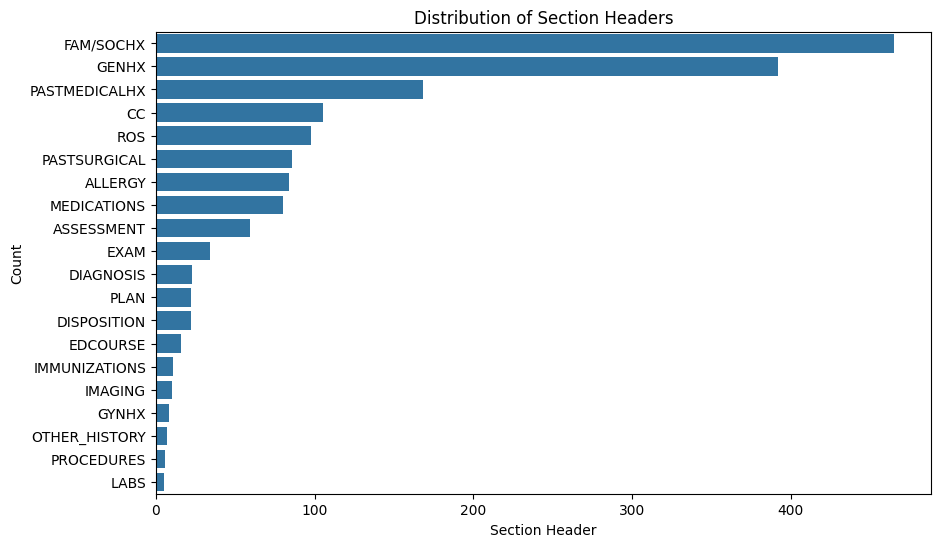

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(df.section_header, order=df.section_header.value_counts().index)
plt.title('Distribution of Section Headers')
plt.xlabel('Section Header')
plt.ylabel('Count')
plt.show()

> This plot shows that the majority of dialogues in the MTS-DIALOG dataset are related to Family/Social History (Fam/SocHx) and General History (GenHx). This is not surprising, as these components are fundamental to most medical encounters

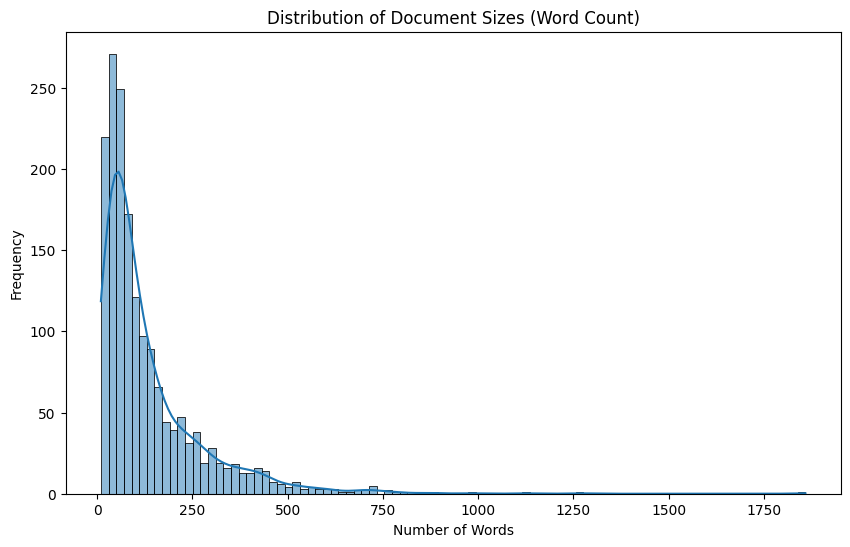

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(words_list, kde=True) 
plt.title('Distribution of Dialogue Sizes (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

> The distribution of dialogue lengths shows that most dialogues range between 50 and 200 words, which may impact the design of the RAG pipeline espacially on the chunking phase

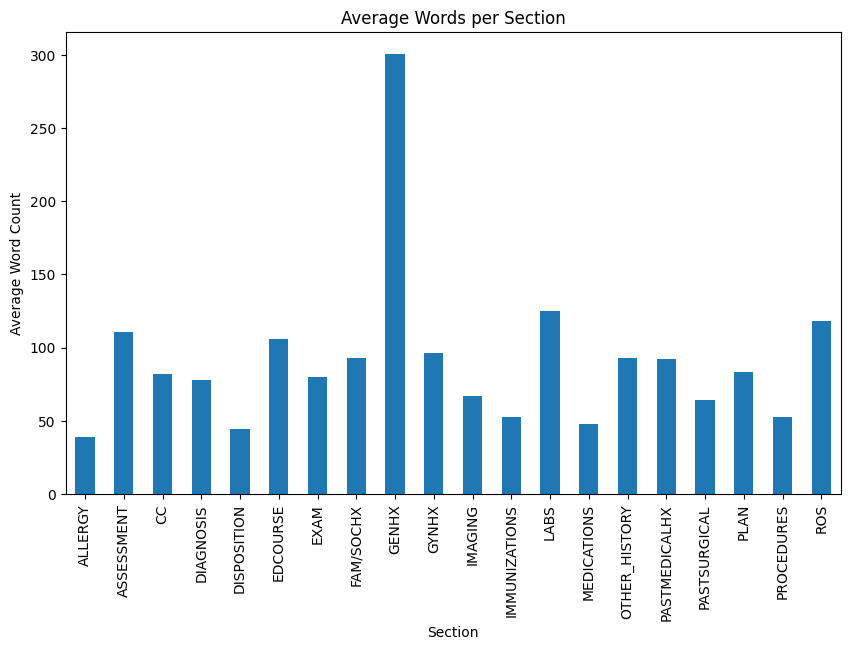

In [30]:
avg_words_per_section = df.groupby('section_header')['dialogue'].apply(lambda x: x.apply(lambda text: len(word_tokenize(text))).mean())
plt.figure(figsize=(10,6))
avg_words_per_section.plot(kind='bar')
plt.title('Average Words per Section')
plt.xlabel('Section')
plt.ylabel('Average Word Count')
plt.show()


>this graph show that The General History (GenHx) category has the highest word count in the dialogues. This is expected because GenHx covers a wide range of topics, such as past medical history, surgeries, medications, allergies, and immunizations. These discussions are often detailed and lengthy, as they provide a comprehensive overview of the patient’s health